# Flight Price Prediction

In [ ]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn import preprocessing,svm
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
def evaluate_model(test,pred):
    print("R^2:",r2_score(test, pred))#R-squard val
    print("MAE:",mean_absolute_error(test,pred))#Absol mean erro
    print("RMSE:",np.sqrt(mean_squared_error(test, pred)))#Root mean sq erro
    print("")
    
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    e = 0
 
    for e in range(n_minibatches + 1):
        mini_batch = data[e * batch_size:(e + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]  
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if(data.shape[0] % batch_size != 0):
        mini_batch = data[e * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return(mini_batches)

def perform_lr(X_train,X_test,train_y, test_y):
    lr = LinearRegression()
    lr.fit(X_train,train_y)
    y_pred = lr.predict(X_test)
    #print("Training loss:",lr.score(y_pred,test_y))
    evaluate_model(test_y,y_pred)
    
def perform_sgd(X_train,train_y, X_test, test_y,alpha=0.0001, epsilon=0.1, eta0=0.01,penalty=None,learning_rate='invscaling',batchsize=1):
    print("penalty term:",penalty,",learning rate:",learning_rate,",batch size:",batchsize)
    X_train = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    X_test = np.append(X_test,identity_vector[:X_test.shape[0],:],1)

    model = SGDRegressor(alpha=alpha, epsilon=epsilon, eta0=eta0,penalty=penalty, learning_rate=learning_rate)
    if batchsize > 1:
        batcherator = create_mini_batches(X_train, train_y,batch_size=batchsize)
        for X_chunk, y_chunk in batcherator:
            y_chunk = y_chunk.squeeze(1)
            model.partial_fit(X_chunk, y_chunk)
    else:
        train_y = train_y.squeeze(1)
        model.fit(X_train, train_y)
        
    y_predicted = model.predict(X_test)
    evaluate_model(test_y,y_predicted)

def perform_pr(X_train,X_test,train_y,test_y):
    p = preprocessing.PolynomialFeatures(degree=2)
    X_train_poly = p.fit_transform(X_train)
    X_test_poly = p.fit_transform(X_test)
    X_train_poly = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    X_test_poly = np.append(X_test,identity_vector[:X_test.shape[0],:],1)
    pr = LinearRegression()
    pr.fit(X_train_poly,train_y)
    y_pred = pr.predict(X_test_poly)
    evaluate_model(test_y,y_pred)
    
def add_poly(X_train,X_test):
    p = preprocessing.PolynomialFeatures(degree=2)
    X_train_poly = p.fit_transform(X_train.iloc[:,:25])
    X_test_poly = p.fit_transform(X_test.loc[:,:25])
    X_train_poly = StandardScaler().fit_transform(X_train_poly)
    X_test_poly = StandardScaler().fit_transform(X_test_poly)
    X_train_poly = np.append(X_train_poly,X_train.loc[:,26:],1)
    X_test_poly = np.append(X_test_poly,X_test.iloc[:,26:],1)
    return(X_train_poly,X_test_poly)


def perform_ridge(X_train,train_y,X_test,test_y,alpha=0.5):
    rdg = Ridge(alpha = alpha)
    print("alpha:",alpha)
    rdg.fit(X_train, train_y)
    pred_test_rr= rdg.predict(X_test)
    evaluate_model(test_y,pred_test_rr)
    
def perform_l(X_train,y_train,X_test,test_y,alpha=0.1):
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_train, y_train) 
    pred_train_lasso= model_lasso.predict(X_test)
    print("alpha:",alpha)
    evaluate_model(test_y,pred_train_lasso)
    
def perform_en(X_train, y_train,X_test,test_y,alpha=0.1,l1=0.5):
    model = ElasticNet(alpha=alpha,l1_ratio=l1)
    model.fit(X_train, y_train) 
    pred_test = model.predict(X_test)
    print("alpha:",alpha,",l1 ratio:",l1)
    evaluate_model(test_y,pred_test)
    
def k_fold_closed(X_train,y_train):
    model = Ridge(alpha=0.000000000000000000000000000000001)
    pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', model)])    
    cv = KFold(n_splits=4, random_state=20, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',
                             cv=cv, n_jobs=-1)
    return sqrt(mean(absolute(scores)))
    
def k_fold_sgd(X_train,train_y):
    cv = KFold(n_splits=4, random_state=1, shuffle=True)
    model = SGDRegressor()
    sgd_x = StandardScaler().fit_transform(X_train)
    sgd_y = train_y.squeeze(1)
    sgd_x = np.append(sgd_x,identity_vector[:sgd_x.shape[0],:],1)
    scores = cross_val_score(model, sgd_x, sgd_y, scoring='neg_mean_absolute_error',
                             cv=cv, n_jobs=-1)
    return sqrt(mean(absolute(scores)))

## Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical? 

Ans:

No. of rows = 300153 and No. of columns= 12.

From below results we can see that attributes,'airline', 'flight','source_City', 'departure_time','stops','arrival_time','destination_city,'class' are categorical. 
Whereas 'duration', and price are continuous attributes. And 'days_left' is a discrete attribute.**

**Import Dataset - Flight Price Prediction**

In [ ]:
#Import dataset
flight_data=pd.read_csv('C:/Users/diksh/Desktop/IUB/Spring_2023/AML/Assignment 1/Clean_Dataset/Clean_Dataset.csv', header=[0])
flight_data.head(8) #Display first 8 values of the dataset

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060


In [ ]:
#Before: Total number of rows and columns
print(flight_data.shape)
print(f"\nBefore:")
print("No. of rows :",flight_data.shape[0])
print("No. of columns :",flight_data.shape[1])

(300153, 12)

Before:
No. of rows : 300153
No. of columns : 12


In [ ]:
#Drop Unnamed column
flight_data=flight_data.drop('Unnamed: 0', axis=1)

In [ ]:
#After: Total number of rows and columns
print(flight_data.shape)
print(f"\nAfter:")
print("No. of rows :",flight_data.shape[0])
print("No. of columns :",flight_data.shape[1])

(300153, 11)

After:
No. of rows : 300153
No. of columns : 11


In [ ]:
flight_data.info(memory_usage='deep') #Checking attribute types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 152.8 MB


In [ ]:
print("Days_left attribute unique values :",flight_data['days_left'].unique())
print("Price attribute unique values :",flight_data['price'].unique())
print("Duration attribute unique values :",flight_data['duration'].unique())

Days_left attribute unique values : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Price attribute unique values : [ 5953  5956  5955 ... 87051 74731 77105]
Duration attribute unique values : [ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.42  7.67  8.33 10.42 23.75 19.5   6.5  12.42 21.08 28.17 28.25  9.25
 17.92  7.08 13.83  7.58 15.83 24.42  4.17  4.25  5.08 29.33 17.   27.17
 24.75  5.75 12.75 13.75 17.83  5.5  23.83  5.   26.5  12.83  8.92 11.17
 12.17 15.58 15.75  7.92 13.25 16.   22.75  6.33  7.25 30.08 18.25  6.08
  2.   12.33  3.5  10.25 14.17 25.58  4.08  9.75  6.67  9.67 10.08 12.58
  7.    8.25 15.5  10.17 23.5  25.75 11.5  21.42 14.25  7.75  5.33  5.67
  4.75 19.33  6.25 10.33  9.08 15.42  4.83 25.8


**Observations:**

No. of rows = 300153 and No. of columns= 12.

From above results we can see that attributes,'airline', 'flight','source_City', 'departure_time','stops','arrival_time','destination_city,'class' are categorical. 
Whereas 'duration', and price are continuous attributes. And 'days_left' is a discrete attribute.**

In [ ]:
categorical_attrs= flight_data.select_dtypes(include='object').columns.tolist()
continuous_attrs=flight_data.select_dtypes(include='number').columns.tolist()
print("Total Categorical Attributes:", len(categorical_attrs), ",","Attribute Names -", categorical_attrs)
print("Total Continuous Attributes:", len(continuous_attrs), ",","Attribute Names -",continuous_attrs)


Total Categorical Attributes: 8 , Attribute Names - ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
Total Continuous Attributes: 3 , Attribute Names - ['duration', 'days_left', 'price']


## Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require? 

Ans. From below visualizations, we can see that 'days_left' attribute is a discrete attribute.

In the below pie chart we can se that 'source_city' attribute takes 6 values.
In the below pie chart we can se that 'destination_city' attribute takes 6 values.
From the below visualizations, we can se that attributes like destination_city, source_city, arrival_time, departure_time and stops are categorical variables.
Therefore we need to convert them to numerical values before proceeding with applying any ML models. So, for attributes, 'stops', 'departure_time', 'arrival_time', 'class', we have encoded them to defined numeric value. And we have used one hot encoder to convert to convert the attributes, "source_city" and "destination_city". 


#### **EDA**

In [ ]:
flight_data.duplicated().sum() #Check for duplicate rows 

0

In [ ]:
# Total no. of missing values for each attribute
flight_data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### **Statistical values for each attribute**

In [ ]:
# Statistical values for each attribute"
flight_data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


### **Attributes - Data Visualization**

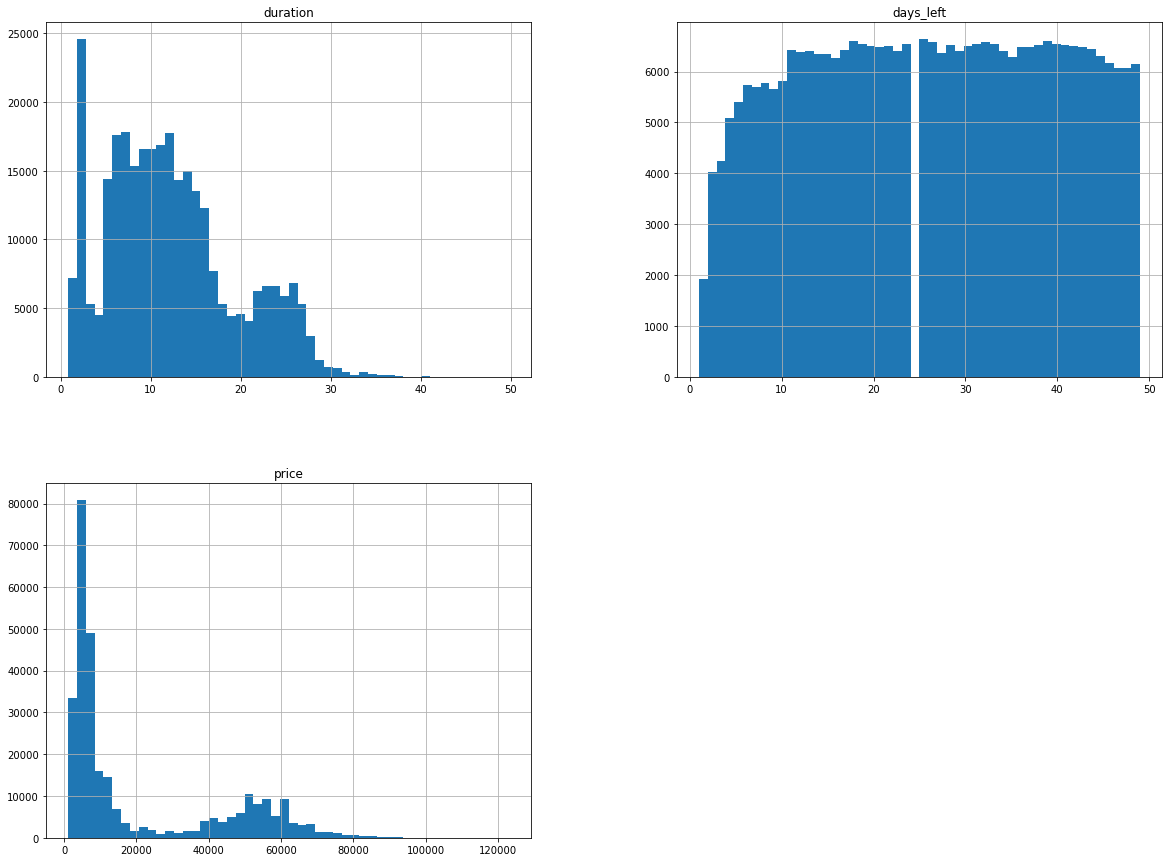

In [ ]:
#Plotting hidtograms
flight_data.hist(bins=50, figsize=(20,15))
plt.show()

**Observation: From the above visualizations, we can see that 'days_left' attribute is a discrete attribute.**

In [ ]:
flight_data['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

C:\Users\diksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline', ylabel='price'>

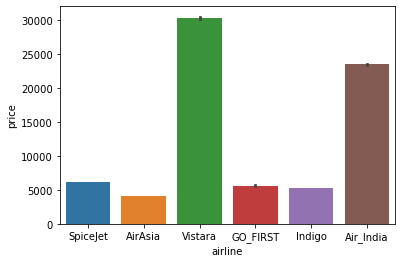

In [ ]:
sns.barplot('airline','price',data=flight_data)

**From the above graph, we can see that, Vistara's fare is maximum and AirAsia has the minimum fare.**

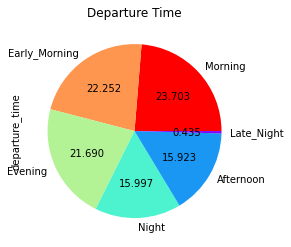

In [ ]:
plt.figure(figsize = (12,4))
flight_data["departure_time"].value_counts().plot(kind = "pie",cmap = 'rainbow_r',autopct="%.3f")
plt.title("Departure Time")#plot grph
plt.show()

**In the above pie chart we can se that 'departure_time' attribute takes 6 values.**


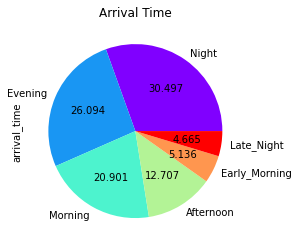

In [ ]:
plt.figure(figsize = (12,4))
flight_data["arrival_time"].value_counts().plot(kind="pie",cmap = 'rainbow',autopct = "%.3f",)
plt.title("Arrival Time")#plot grph
plt.show()

**In the above pie chart we can se that 'arrival_time' attribute takes 6 values.**

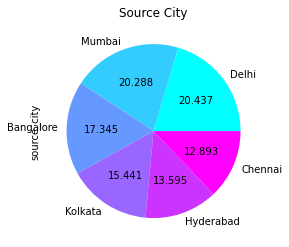

In [ ]:
plt.figure(figsize = (12,4))
flight_data["source_city"].value_counts().plot(kind="pie",cmap = 'cool',autopct = "%.3f",)
plt.title("Source City")#plot grph
plt.show()

**In the above pie chart we can se that 'source_city' attribute takes 6 values.**

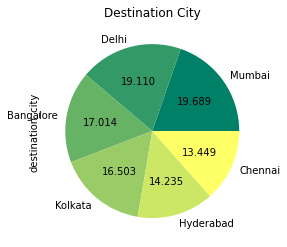

In [ ]:
plt.figure(figsize = (12,4))
flight_data["destination_city"].value_counts().plot(kind="pie",cmap = 'summer',autopct = "%.3f",)
plt.title("Destination City")#plot grph
plt.show()

**In the above pie chart we can se that 'destination_city' attribute takes 6 values.**

**Visualization Observations/Results:**

From the above visualizations, we can se that attributes like destination_city, source_city, arrival_time, departure_time and stops are categorical variables.
Therefore we need to convert them to numerical values before proceeding with applying any ML models. So, for attributes, 'stops', 'departure_time', 'arrival_time', 'class', we have encoded them to defined numeric value. And we have used one hot encoder to convert to convert the attributes, "source_city" and "destination_city". 

In [ ]:
#Dropping the 'flight' attribute
flight_data = flight_data.drop("flight", axis = 1)
flight_data.head(1)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


### **Encoding to defined values**

In [ ]:
#Encoding to defined values
flight_data["stops"].replace({'zero':0,'one':1,'two_or_more':2},inplace=True)
flight_data["departure_time"].replace({'Night':0,'Early_Morning':1,'Morning':2,
                               'Afternoon':3,'Evening':4,'Late_Night':5},inplace=True)
flight_data["arrival_time"].replace({'Night':0,'Early_Morning':1,'Morning':2,
                             'Afternoon':3,'Evening':4,'Late_Night':5},inplace=True)
flight_data["class"].replace({"Economy":0,"Business":1},inplace=True)
flight_data.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,4,0,0,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,1,0,2,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,1,0,1,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,2,0,3,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,2,0,2,Mumbai,0,2.33,1,5955


In [ ]:
flight_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  int64  
 3   stops             300153 non-null  int64  
 4   arrival_time      300153 non-null  int64  
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  int64  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 71.1 MB


### **Encoding using onehot encoder**

In [ ]:
# encoding using onehot encoder

from sklearn.preprocessing import OneHotEncoder
onehot_enc = OneHotEncoder()
flight_data[list(flight_data["airline"].unique())]= onehot_enc.fit_transform(flight_data[["airline"]]).A
flight_data = pd.concat([flight_data,pd.get_dummies(flight_data["destination_city"],prefix = "destination_city")], axis = 1)
flight_data=pd.concat([flight_data,pd.get_dummies(flight_data["source_city"],prefix = "source_city")], axis = 1)

#Droping"source_city","airline","destination_city" attributes
flight_data.drop(["source_city","airline","destination_city"],axis = 1,inplace=True)
flight_data.head(4)

,departure_time,stops,arrival_time,class,duration,days_left,price,SpiceJet,AirAsia,Vistara,...,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,4,0,0,0,2.17,1,5953,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0
1,1,0,2,0,2.33,1,5953,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0
2,1,0,1,0,2.17,1,5956,1.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0
3,2,0,3,0,2.25,1,5955,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0


# Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. 

Note: Scatterplots have been generated in the **EDA section** of Q2.

### **Correlation**

In [ ]:
#Pearson Correlation Coefficients between all data attributes and the label
pearson_corr_label = flight_data.corr()["price"]
print(f"Pearson Correlation Coefficient between all data attributes and label:  \n \n",pearson_corr_label)

Pearson Correlation Coefficient between all data attributes and label:  
 
 departure_time               -0.032200
stops                         0.119648
arrival_time                 -0.016877
class                         0.937860
duration                      0.204222
days_left                    -0.091949
price                         1.000000
SpiceJet                     -0.176188
AirAsia                       0.070041
Vistara                      -0.194179
GO_FIRST                     -0.280882
Indigo                       -0.114019
Air_India                     0.360816
destination_city_Bangalore    0.014050
destination_city_Chennai      0.018473
destination_city_Delhi       -0.052527
destination_city_Hyderabad   -0.008292
destination_city_Kolkata      0.020956
destination_city_Mumbai       0.010533
source_city_Bangalore         0.011702
source_city_Chennai           0.018742
source_city_Delhi            -0.043282
source_city_Hyderabad        -0.012828
source_city_Kolkata        

**From above, we can see that departure_time,arrival_time , days_left have negative correlation with 'price' attribute which is the target attribute. 'Class' has the strongest positive linear association with the 'price' attribute.**

Pearson Correlation Coefficient between all data attributes:  
 
                             departure_time     stops  arrival_time     class  \
departure_time                    1.000000  0.008104     -0.038493 -0.032428   
stops                             0.008104  1.000000      0.015004  0.001027   
arrival_time                     -0.038493  0.015004      1.000000 -0.018187   
class                            -0.032428  0.001027     -0.018187  1.000000   
duration                         -0.014876  0.468059      0.002074  0.138710   
days_left                        -0.006087 -0.008540      0.002395 -0.013039   
price                            -0.032200  0.119648     -0.016877  0.937860   
SpiceJet                         -0.002720  0.038277      0.066924 -0.160113   
AirAsia                          -0.015916  0.060215     -0.033329  0.124899   
Vistara                           0.015177 -0.033363      0.006996 -0.194540   
GO_FIRST                          0.069280 -0.172133  

<AxesSubplot:>

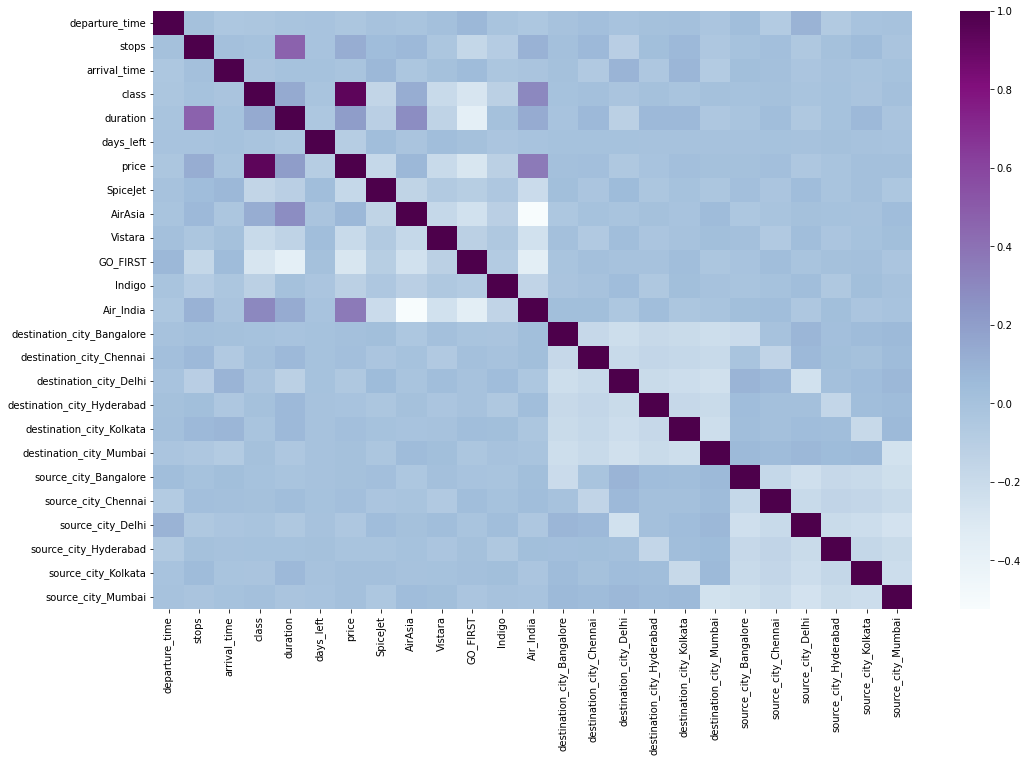

In [ ]:
#Pearson Correlation Coefficients between all data attributes
pearson_corr_all_attrs = flight_data.corr()# Compute the PCC between each data attribute and the label
print(f"Pearson Correlation Coefficient between all data attributes:  \n \n",pearson_corr_all_attrs)

#Plot heatmap using cmap
plt.figure(figsize=(17,11))
sns.heatmap(pearson_corr_all_attrs, cmap='BuPu')  

In [ ]:
flight_data_copy = flight_data.copy()
flight_data = pd.get_dummies(flight_data, drop_first=True)
print(f'Dataset before One Hot Encoding: {flight_data_copy.shape}')
print(f'Dataset after One Hot Encoding: {flight_data.shape}')

Dataset before One Hot Encoding: (300153, 25)
Dataset after One Hot Encoding: (300153, 25)


In [ ]:
flight_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   departure_time              300153 non-null  int64  
 1   stops                       300153 non-null  int64  
 2   arrival_time                300153 non-null  int64  
 3   class                       300153 non-null  int64  
 4   duration                    300153 non-null  float64
 5   days_left                   300153 non-null  int64  
 6   price                       300153 non-null  int64  
 7   SpiceJet                    300153 non-null  float64
 8   AirAsia                     300153 non-null  float64
 9   Vistara                     300153 non-null  float64
 10  GO_FIRST                    300153 non-null  float64
 11  Indigo                      300153 non-null  float64
 12  Air_India                   300153 non-null  float64
 13  destination_ci

# Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset. 

Ans: 

After preprocessing the data which incuded converting categorical data to numeric format and doign hot encoding, data was splitted into training (80%) and testing dataset(20%) which can be seen in the below codes.

To verify that the test portion is representative of the entire dataset, mean and standard values were calculated of the training and trsting dataset which were equal for both of them.

Training set shape: (240122, 24) (240122, 1)
Testing set shape: (60031, 24) (60031, 1)
Training set mean: 1.9443897754752466 20859.692722865875
Testing set mean: 1.9417646577046308 21009.530725791676
Training set standard deviation: 6.418887995692805 22668.001992397778
Testing set standard deviation: 6.411858324148167 22815.85789686507

### **Split dataset : Train and test data**

In [ ]:
X=flight_data.drop(['price'],axis=1)
y=flight_data['price']

instances = X.shape[0]
features = X.shape[1]

# Converting each dataframe into a numpy array since each dataframe contains only 1 column
X = np.array(X).reshape(-1, features)
y = np.array(y).reshape(-1, 1)

identity_vector = np.asarray([[1 for num in range(instances)]])
identity_vector = identity_vector.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=40)
# print(X_train, X_test, y_train)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Training set mean:", X_train.mean(), y_train.mean())
print("Testing set mean:", X_test.mean(), y_test.mean())
print("Training set standard deviation:", X_train.std(), y_train.std())
print("Testing set standard deviation:", X_test.std(), y_test.std())

Training set shape: (240122, 24) (240122, 1)
Testing set shape: (60031, 24) (60031, 1)
Training set mean: 1.9443897754752466 20859.692722865875
Testing set mean: 1.9417646577046308 21009.530725791676
Training set standard deviation: 6.418887995692805 22668.001992397778
Testing set standard deviation: 6.411858324148167 22815.85789686507


### **Scaling values**

In [ ]:
# Scaling values
from sklearn.preprocessing import MinMaxScaler
mm_scaler=MinMaxScaler(feature_range=(0,1))
X_train=mmscaler.fit_transform(X_train)#for trainin
X_test=mmscaler.fit_transform(X_test)#test
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)  

# Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with closed form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. Display the training and validation loss as a function of training iterations

### **Train model using linear regression (closed form)**

In [ ]:
#Train model using linear regression(closed form)
perform_lr(X_train,X_test,y_train, y_test)

R^2: 0.908659497825657
MAE: 4566.201545867968
RMSE: 6895.543471893089



### **Train model using linear regression (SGD)**

In [ ]:
#Train model using linear regression(SGD)
perform_sgd(X_train,y_train, X_test, y_test,penalty='elasticnet',learning_rate='constant',batchsize=5)
perform_sgd(X_train,y_train, X_test, y_test,penalty='l1',learning_rate='optimal',batchsize=10)
perform_sgd(X_train,y_train, X_test, y_test,penalty='l2',learning_rate='adaptive',batchsize=100)
perform_sgd(X_train,y_train, X_test, y_test,penalty='l2',learning_rate='invscaling',batchsize=50)
perform_sgd(X_train,y_train, X_test, y_test)

penalty term: elasticnet ,learning rate: constant ,batch size: 5
R^2: 0.9044464836741251
MAE: 4694.347733868583
RMSE: 7052.776802363786

penalty term: l1 ,learning rate: optimal ,batch size: 10
R^2: 0.8813455255125761
MAE: 5349.054076156575
RMSE: 7859.209457129442

penalty term: l2 ,learning rate: adaptive ,batch size: 100
R^2: 0.9059479674274796
MAE: 4593.5968604858845
RMSE: 6997.145359284531

penalty term: l2 ,learning rate: invscaling ,batch size: 50
R^2: 0.9085823070876708
MAE: 4573.60131702144
RMSE: 6898.456526179424

penalty term: None ,learning rate: invscaling ,batch size: 1
R^2: 0.9086091978668465
MAE: 4556.500150673111
RMSE: 6897.441851071723



**Observations:**
From above results, we can see that the R-squared values range are approximately around 0.90. The combination with Penalty:l2, adaptive learning rate and batch size=100 performs the best since it has the highest R-squared values and minimum MAE and RMSE values. But combination with batch size 1 is also showing approximate same results but will be expensive computationally. 

# Repeat the previous step with polynomial regression. Using validation loss, explore if your model overfits/underfits the data. 

### **Train model using polynomial regression (Closed form)**

In [ ]:
#Train model using polynomial regression(Closed form)
perform_pr(X_train,X_test, y_train,y_test)

R^2: 0.9086597639606981
MAE: 4564.889323849345
RMSE: 6895.533426255952



In [ ]:
X_train.columns

RangeIndex(start=0, stop=24, step=1)

### **Train model using polynomial regression (SGD)**

In [ ]:
#Train model using polynomial regression(SGD)

#Add polynomial features
X_train_poly,X_test_poly = add_poly(X_train,X_test)

perform_sgd(X_train_poly,y_train, X_test_poly, y_test,penalty='elasticnet',learning_rate='constant',batchsize=5)
perform_sgd(X_train_poly,y_train, X_test_poly, y_test,penalty='l1',learning_rate='optimal',batchsize=10)
perform_sgd(X_train_poly,y_train, X_test_poly, y_test,penalty='l2',learning_rate='adaptive',batchsize=100)
perform_sgd(X_train_poly,y_train, X_test_poly, y_test)

penalty term: elasticnet ,learning rate: constant ,batch size: 5
R^2: -2463847763688229.0
MAE: 783016940590.4034
RMSE: 1132514414433.919

penalty term: l1 ,learning rate: optimal ,batch size: 10
R^2: -8.32446048929315e+16
MAE: 4865151561268.458
RMSE: 6582863524946.569

penalty term: l2 ,learning rate: adaptive ,batch size: 100
R^2: -2273593944520648.5
MAE: 810524250454.5323
RMSE: 1087910717541.044

penalty term: None ,learning rate: invscaling ,batch size: 1
R^2: 0.9467567775058217
MAE: 3351.5409097992083
RMSE: 5264.643522102705



**Observations:**
From above results, we can see that the R-squared values are negative for first three batches, i.e., 5,10 and 100 batch size indicating they are performing poorly. Therefore combination with batch size 1 performs the best since it has the highest R-squared values and minimum MAE and RMSE values.

### **Implement k fold with closed form using linear regression model**

In [ ]:
#Implement k fold with closed form using linear regression model
k_fold_closed(X_train, y_train)

67.20622277410914

**Observations**:Since the test error is significantly greater than validation error, the model is overfitting the training data.

### **Implement k fold with sgd using linear regression model**

In [ ]:
#Implement k fold with sgd using linear regression model
k_fold_sgd(X_train,y_train)

67.23980559673198

Observations:Since the test error is significantly greater than validation error, the model is overfitting the training data.

### **Implement k fold with closed form using polynomial regression model**

In [ ]:
#Implement k fold with closed form using polynomial regression model
k_fold_closed(X_train_poly, y_train)

57.72606726942951

**Observations**:Since the test error is significantly greater than validation error, the model is overfitting the training data.

### **Implement k fold with sgd using polynomial regression model**

In [ ]:
#Implement k fold with sgd using polynomial regression model
k_fold_sgd(X_train_poly,y_train)

57.79936887488299

Observations:Since the test error is significantly greater than validation error, the model is overfitting the training data.

# Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. 

### Regularization for Linear Regression Models

#### Perform Regularization(Ridge)

In [ ]:
#Perform Regularization(Ridge)
perform_ridge(X_train,y_train,X_test,y_test,alpha=0.000000001)
perform_ridge(X_train,y_train,X_test,y_test,alpha=0.5)
perform_ridge(X_train,y_train,X_test,y_test,alpha=5)
perform_ridge(X_train,y_train,X_test,y_test,alpha=1000)

alpha: 1e-09
R^2: 0.9086594314191807
MAE: 4564.301393484596
RMSE: 6895.5459784955865

alpha: 0.5
R^2: 0.9086593550512971
MAE: 4564.276710745106
RMSE: 6895.548861103778

alpha: 5
R^2: 0.9086586549932678
MAE: 4564.055256245602
RMSE: 6895.575285676869

alpha: 1000
R^2: 0.9079984697949238
MAE: 4540.792803488723
RMSE: 6920.449895284855



Observations:
From above results, for all alpha values the R-squared values is almost same, i.e., 0.90, indicating model explains variability in data. And MAE and RMSE  are also approximately same. Overall, we can say that the model performs good over different alpha values.

#### Perform Regularization(Lasso)

In [ ]:
#Perform Regularization(Lasso)
  
perform_l(X_train, y_train,X_test,y_test,alpha=0.0000000001)
perform_l(X_train, y_train,X_test,y_test,alpha=0.1)
perform_l(X_train, y_train,X_test,y_test,alpha=5)
perform_l(X_train, y_train,X_test,y_test,alpha=100)

C:\Users\diksh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.991e+11, tolerance: 1.234e+10
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-10
R^2: 0.9086594314191807
MAE: 4564.301393484463
RMSE: 6895.545978495587

alpha: 0.1
R^2: 0.9086593492434831
MAE: 4564.122996919473
RMSE: 6895.549080327457

alpha: 5
R^2: 0.9086468328342586
MAE: 4551.393987296527
RMSE: 6896.021512683287

alpha: 100
R^2: 0.9058388835127396
MAE: 4423.570922784745
RMSE: 7001.201916056857



Observations:
From above results, for all alpha values the R-squared values is almost same, i.e., 0.90 and MAE and RMSE  are also approximately same. Overall, we can say that the model performs good over different alpha values and would require further analysis.

#### Perform Regularization(Elastic net)

In [ ]:
#Perform Regularization(Elastic net)
    
perform_en(X_train, y_train,X_test,y_test,alpha=0.0000000001,l1=0.5)
perform_en(X_train, y_train,X_test,y_test,alpha=0.1,l1=0.8)
perform_en(X_train, y_train,X_test,y_test,alpha=5,l1=0.5)
perform_en(X_train, y_train,X_test,y_test,alpha=100,l1=0.2)

C:\Users\diksh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.577e+12, tolerance: 1.234e+10
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-10 ,l1 ratio: 0.5
R^2: 0.9086594314173237
MAE: 4564.301392957452
RMSE: 6895.5459785656785

alpha: 0.1 ,l1 ratio: 0.8
R^2: 0.8993703731582773
MAE: 4774.607193701609
RMSE: 7237.68594431619

alpha: 5 ,l1 ratio: 0.5
R^2: 0.16132501371799246
MAE: 18015.602135547237
RMSE: 20894.580122853276

alpha: 100 ,l1 ratio: 0.2
R^2: 0.005844084351429912
MAE: 19750.15938985015
RMSE: 22749.091307483486



Observations:
From above results, for alpha value=1e-10 and l1 ratio:0.5, the model performs the best with R-squared value=0.90 while for other alpha values, the R-squared value are relatively low.It indicates that the model with alpha value=1e-10 and l1 ratio:0.5 fits and performs better than other models and have lower error predictions.

### Regularization for Polynomial Regression Models

#### Perform Regularization(Ridge)

In [ ]:
#Perform Regularization(Ridge)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=0)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=0.000000001)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=0.5)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=5)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=1000)

alpha: 0
R^2: -1.9623989566527864e+23
MAE: 6754552288066773.0
RMSE: 1.0107190595019506e+16

alpha: 1e-09
R^2: 0.9477107316727497
MAE: 3301.0613134912483
RMSE: 5217.267274863224

alpha: 0.5
R^2: 0.9477107265499982
MAE: 3301.055212464926
RMSE: 5217.267530429651

alpha: 5
R^2: 0.9477105301809777
MAE: 3301.004740785923
RMSE: 5217.277326977632

alpha: 1000
R^2: 0.9475989633490007
MAE: 3295.044240092771
RMSE: 5222.840253425734



Observation: From above results, we can see that for model with alpha=0, the R-squared value is negative while for other models, the R-squared value is almost the same, i.e., 0.94. Models with alpha values= 1e-09, 0.5 and 5 have similar R-squared and MAE and RMSE values. And model with alpha-=1000 has the least performance since it has lower MAE and RMSE values.

#### Perform Regularization(Lasso)

In [ ]:
#Perform Regularization(Lasso)
  
perform_l(X_train_poly,y_train,X_test_poly,y_test,alpha=0.0000000001)
perform_l(X_train_poly,y_train,X_test_poly,y_test,alpha=0.1)
perform_l(X_train_poly,y_train,X_test_poly,y_test,alpha=5)
perform_l(X_train_poly,y_train,X_test_poly,y_test,alpha=100)

C:\Users\diksh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.223e+12, tolerance: 1.234e+10
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-10
R^2: 0.9477143832494682
MAE: 3301.045312407546
RMSE: 5217.085099964403



C:\Users\diksh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.863e+12, tolerance: 1.234e+10
  model = cd_fast.enet_coordinate_descent(


alpha: 0.1
R^2: 0.9477157788732344
MAE: 3300.596029951559
RMSE: 5217.015471479587



C:\Users\diksh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.237e+12, tolerance: 1.234e+10
  model = cd_fast.enet_coordinate_descent(


alpha: 5
R^2: 0.9476480289538448
MAE: 3278.0658580448976
RMSE: 5220.39448280668

alpha: 100
R^2: 0.9426433425460955
MAE: 3398.912933517293
RMSE: 5464.226842489857



Observations: Model with alpha=100 has the least performance due to lower RMSE and MAE values. While model with alpha=0.1 and alpha=5 performs better than other models.

#### Perform Regularization(Elastic net)

In [ ]:
#Perform Regularization(Elastic net)
    
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=0.0000000001,l1=0.5)
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=0.1,l1=0.8)
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=5,l1=0.5)
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=100,l1=0.2)

C:\Users\diksh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.227e+12, tolerance: 1.234e+10
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-10 ,l1 ratio: 0.5
R^2: 0.9477143832496008
MAE: 3301.0453122507793
RMSE: 5217.085099957789



C:\Users\diksh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.753e+11, tolerance: 1.234e+10
  model = cd_fast.enet_coordinate_descent(


alpha: 0.1 ,l1 ratio: 0.8
R^2: 0.9466640620448311
MAE: 3313.2599754585026
RMSE: 5269.2253403880795

alpha: 5 ,l1 ratio: 0.5
R^2: 0.863662095131736
MAE: 6069.97135108545
RMSE: 8424.51894359585

alpha: 100 ,l1 ratio: 0.2
R^2: 0.18744466042904884
MAE: 17716.335512753983
RMSE: 20566.636748730016



Observations: From the above results, model with alpha: 1e-10 ,l1 ratio: 0.5 performs the best since it has highest R - squared value and lowest RMSE and MAE values indicating it will perform the best in prediciting the flight price.

In [ ]:
k_fold_closed(X_train_poly, y_train)

57.72606726942951

Observations:Since the test error is significantly greater than validation error, the model is overfitting the training data.

# Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance. 

### **Final Results:**

 
In case of linear regression we see R-squared score of R^2: 0.908 and MAE and RMSE scores = 4566.20 and 6895.54. In case of polynomial regression, we can see that the R-squared values are negative for first three batches, i.e., 5,10 and 100 batch size indicating they are performing poorly. Therefore combination with batch size 1 performs the best since it has the highest R-squared values and minimum MAE and RMSE values.
In case of ridge regression, for all alpha values the R-squared values is almost same, i.e., 0.90, indicating model explains variability in data. And MAE and RMSE  are also approximately same. Overall, we can say that the model performs good over different alpha values.
in case of lasso regression, for all alpha values the R-squared values is almost same, i.e., 0.90 and MAE and RMSE  are also approximately same. Overall, we can say that the model performs good over different alpha values and would require further analysis.
For elastic net, #### Observation: From above results, we can see that for model with alpha=0, the R-squared value is negative while for other models, the R-squared value is almost the same, i.e., 0.94. Models with alpha values= 1e-09, 0.5 and 5 have similar R-squared and MAE and RMSE values. And model with alpha-=1000 has the least performance since it has lower MAE and RMSE values.

In case of ridge polynomial regression, we can see that for model with alpha=0, the R-squared value is negative while for other models, the R-squared value is almost the same, i.e., 0.94. Models with alpha values= 1e-09, 0.5 and 5 have similar R-squared and MAE and RMSE values. And model with alpha-=1000 has the least performance since it has lower MAE and RMSE values.
In case of lasso polynomial regression, Model with alpha=100 has the least performance due to lower RMSE and MAE values. While model with alpha=0.1 and alpha=5 performs better than other models.
In case of elsticnet polynomial regression, model with alpha: 1e-10 ,l1 ratio: 0.5 performs the best since it has highest R - squared value and lowest RMSE and MAE values indicating it will perform the best in prediciting the flight price.


Overall, Evaluation metrics such as MSE, RMSE, or MAE are used to compare performance of different regression models. 


SG performs best with default settings.
Performance of both Ridge and Lasso Linear regression is not affected by the learning rate parameters.
ElasticNet performs better with alpha=1e-10, l1 ratio = 0.5.
Performance of both Ridge and Lasso Polynomial regression is not affected by the learning rate parameters.
Out of all these models, ElasticNet performs the best.
Most of the models are overfitting the data. In order to improve the performance of the model we should:
 
1.   Increase training data using data augmentation
2.   Perform feature selection and remove unnecessary features
3.   Use ensemble learning



# References:


1.https://crunchingthedata.com/continuous-categorical-columns-pandas/
2.https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
3.https://www.kaggle.com/code/omarkhan99/flight-price-prediction
4.https://www.kaggle.com/code/ajeetchansauriya/flight-price-prediction-from-eda-to-accuracy
5.
